##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 2

#### Topics:
- Probability review
- Normal, Chi-Squared, t, and F distributions
- Distributional Properties of the Linear Model
- Solving LS using SVD

#### Due: 9/12/2024 by 18:30


#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preffered) or submit additional notes.

<hr>
<hr>

## Problem 1 (Conditional Expectation)
Let $X$ and $Y$ be two random variables with a probability model $P_{X,Y}$. Let $m : \mathbb R \to \mathbb R$ such that $m(X)$ and $f(X)$ are random variables with finite variance. Suppose that $m(X)$ satisfies the ``orthogonality principle": for any function $f : \mathbb R \to \mathbb R$ such that $f(X)$ is a random variable,
$$
\mathbb E \left[\left(Y - m(X) \right) f(X) \right] = 0.
$$
Namely, the error in predicting the target is ``orthogonal'' to the data. Prove that
$$
\mathbb E \left[\left(Y - m(X) \right)^2 \right] \leq \mathbb E \left[ \left(Y - f(X) \right)^2 \right].
$$

# Solution to Problem 1

## Step 1: Expand the mean squared error

We aim to compare $ \mathbb{E}[(Y - m(X))^2] $ and $ \mathbb{E}[(Y - f(X))^2] $. Start by expanding the general form for the mean squared error:

$$
\mathbb{E}[(Y - f(X))^2] = \mathbb{E}[Y^2] - 2 \mathbb{E}[Y f(X)] + \mathbb{E}[f(X)^2].
$$

Similarly, for $ m(X) $:

$$
\mathbb{E}[(Y - m(X))^2] = \mathbb{E}[Y^2] - 2 \mathbb{E}[Y m(X)] + \mathbb{E}[m(X)^2].
$$

## Step 2: Use the orthogonality principle

The orthogonality principle states:

$$
\mathbb{E}[(Y - m(X)) f(X)] = 0, \text{ for any } f(X).
$$

In particular, this implies:

$$
\mathbb{E}[Y f(X)] = \mathbb{E}[m(X) f(X)].
$$

## Step 3: Compare the mean squared errors

Substitute $ \mathbb{E}[Y f(X)] = \mathbb{E}[m(X) f(X)] $ into the expression for $ \mathbb{E}[(Y - f(X))^2] $:

$$
\mathbb{E}[(Y - f(X))^2] = \mathbb{E}[Y^2] - 2 \mathbb{E}[m(X) f(X)] + \mathbb{E}[f(X)^2].
$$

Similarly, for $ \mathbb{E}[(Y - m(X))^2] $:

$$
\mathbb{E}[(Y - m(X))^2] = \mathbb{E}[Y^2] - 2 \mathbb{E}[m(X)^2] + \mathbb{E}[m(X)^2].
$$

## Step 4: Optimality of $ m(X) $

Finally, subtract $ \mathbb{E}[(Y - m(X))^2] $ from $ \mathbb{E}[(Y - f(X))^2] $:

$$
\mathbb{E}[(Y - f(X))^2] - \mathbb{E}[(Y - m(X))^2] = \mathbb{E}[f(X)^2] - \mathbb{E}[m(X)^2].
$$

The orthogonality principle ensures that the cross-terms involving $ Y $ and $ f(X) $ vanish, making $ m(X) $ the unique minimizer of the mean squared error. Therefore:

$$
\mathbb{E}[(Y - m(X))^2] \leq \mathbb{E}[(Y - f(X))^2],
$$

with equality if and only if $ f(X) = m(X) $.


# Problem 2 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following exercise, you can only sample using repeated calls to ``random.random()``.
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with number of bins about 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretical distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed.

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike.
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly.
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [1]:
# Helper function: Inverse Error Function (erf^-1)
def erf_inv(z: float) -> float:
    """
    Approximation of the inverse error function (erf^-1).
    Source: Abramowitz and Stegun formula 7.1.26.
    """
    a = 0.147
    ln_term = np.log(1 - z**2)
    factor = 2 / (np.pi * a) + ln_term / 2
    return np.sqrt(np.sqrt(factor**2 - ln_term / a) - factor) * (1 if z >= 0 else -1)


# Helper function: Percent-point function (PPF) for the normal distribution
def ppf_normal(u: float) -> float:
    """
    Percent-point function (inverse of CDF) for the standard normal distribution.
    """
    return np.sqrt(2) * erf_inv(2 * u - 1)

# Helper function: Plotting distributions
def plot_distribution(samples, x_vals, pdf_vals, title, bins=100, labels=("Samples", "True PDF")):
    """
    Plot histogram of samples and the theoretical PDF.
    """
    plt.figure(figsize=(12, 6))
    plt.hist(samples, bins=bins, density=True, alpha=0.5, label=labels[0])
    plt.plot(x_vals, pdf_vals, label=labels[1], color="black")
    plt.legend()
    plt.title(title)
    plt.show()


In [2]:
import random
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t, f


def sample_unif(n: int) -> float:
    """
    n independent samples from the uniform distribution over (0,1)
    """

    # YOUR CODE HERE
    return [random.random() for _ in range(n)]


def sample_normal_clt(n: int) -> float:
    """
    Use the CLT to approximately sample from the standard normal distribution

    Args:
        n:    number of samples from a non-normal distribution

    Returns:
        z:    a random sample, approximately from the standard normal distribution

    """

    # YOUR CODE HERE
    samples = sample_unif(n)
    return (sum(samples) - n / 2) / np.sqrt(n / 12)

def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``

    Return:
        z:    a random sample from the standard normal distribution

    """

    # YOUR CODE HERE
    u = random.random()
    return ppf_normal(u)




def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom

    Args:
        k:    number of degrees of freedom (DoF)

    Return:
        x:    random sample from the chisquared distribution with k degrees of freedom

    """

    # YOUR CODE HERE
    return sum(sample_normal()**2 for _ in range(k))

def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom

    Args:
        k:    number of degrees of freedom

    Return:
        x:    random sample from the t distribution

    """

    # YOUR CODE HERE
    numerator = sample_normal()
    denominator = np.sqrt(sample_chisq(k) / k)
    return numerator / denominator

def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom

    Args:
        k1:    number of degrees of freedom numerator
        k2:    number of degrees of freedom denominator

    Return:
        x:    random sample from the F distribution

    """

    # YOUR CODE HERE
    numerator = sample_chisq(k1) / k1
    denominator = sample_chisq(k2) / k2
    return numerator / denominator

In [3]:
MY_ID = 205627920 # your personal ID number with leading zeros removed
random.seed(MY_ID)

# Your code to items 2-4 goes here:
#

# Number of samples
n_samples = 1000

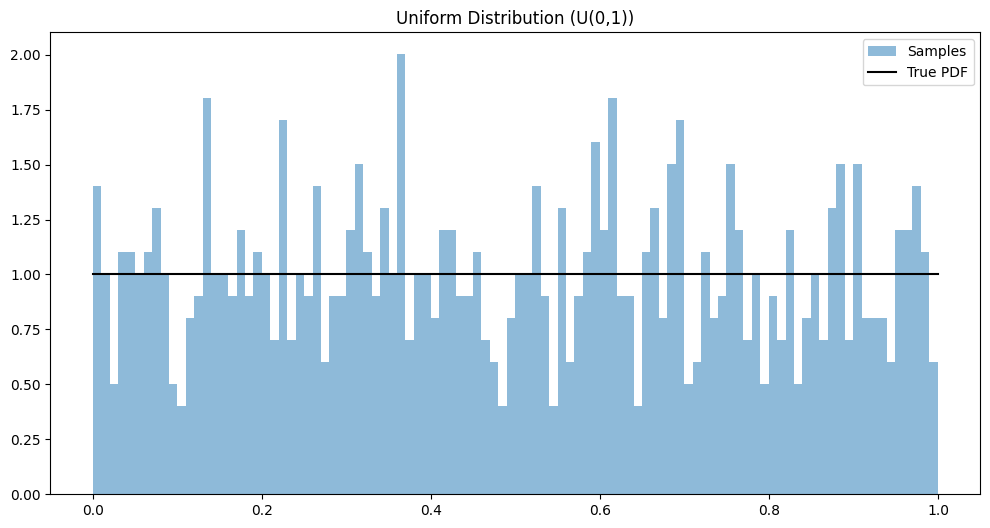

In [4]:
# Task 1: Uniform Distribution
samples_unif = sample_unif(n_samples)
x_unif = np.linspace(0, 1, 1000)
pdf_unif = [1.0 for _ in x_unif]
plot_distribution(samples_unif, x_unif, pdf_unif, "Uniform Distribution (U(0,1))")

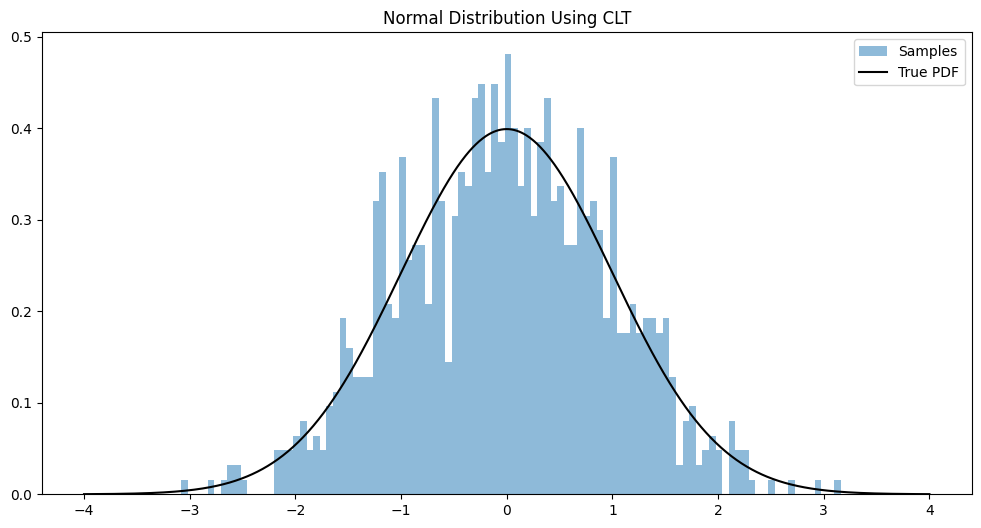

In [5]:
# Task 2: Normal Distribution Using CLT
n_clt_samples = 12  # Number of uniform samples for CLT
samples_clt = [sample_normal_clt(n_clt_samples) for _ in range(n_samples)]
x_norm_clt = np.linspace(-4, 4, 1000)
pdf_norm_clt = norm.pdf(x_norm_clt)
plot_distribution(samples_clt, x_norm_clt, pdf_norm_clt, "Normal Distribution Using CLT")


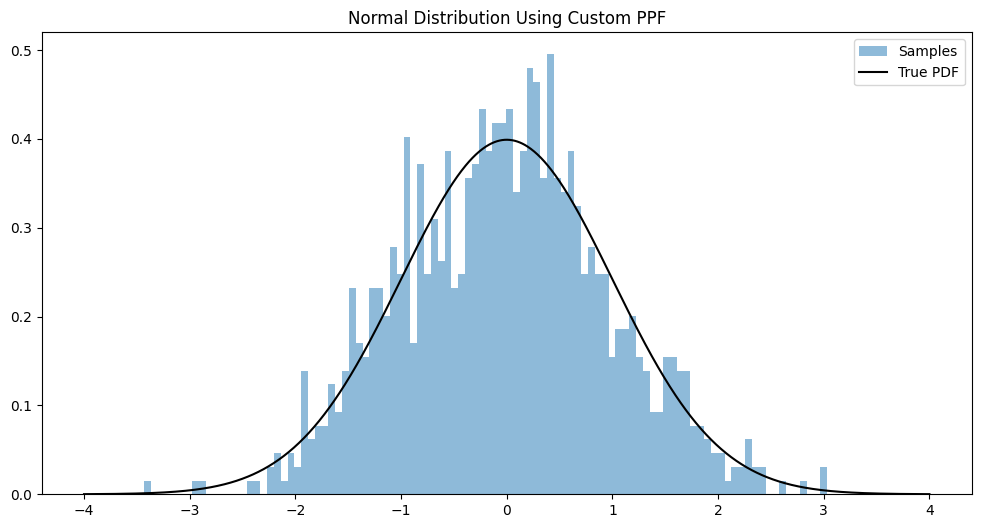

In [6]:
# Task 3: Normal Distribution Using Custom PPF
samples_norm = [sample_normal() for _ in range(n_samples)]
x_norm_ppf = np.linspace(-4, 4, 1000)
pdf_norm_ppf = norm.pdf(x_norm_ppf)
plot_distribution(samples_norm, x_norm_ppf, pdf_norm_ppf, "Normal Distribution Using Custom PPF")


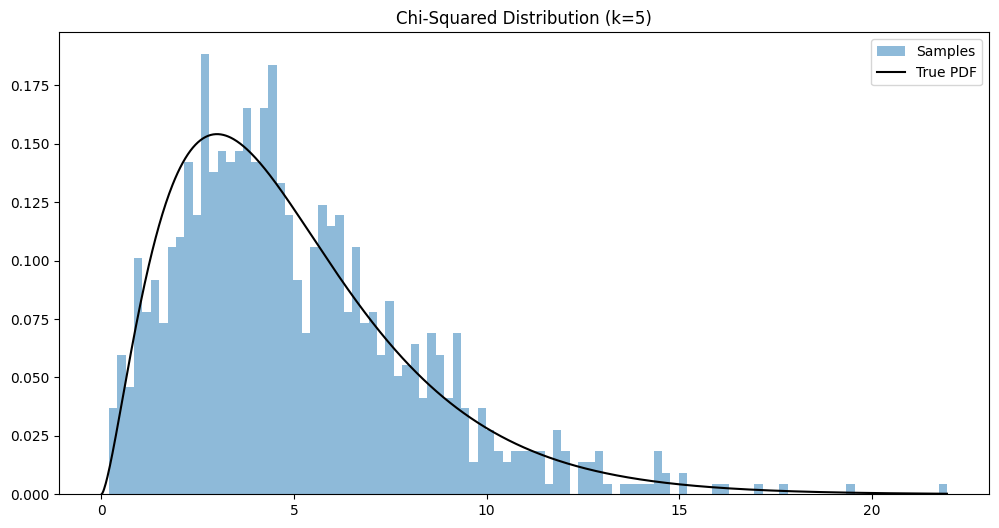

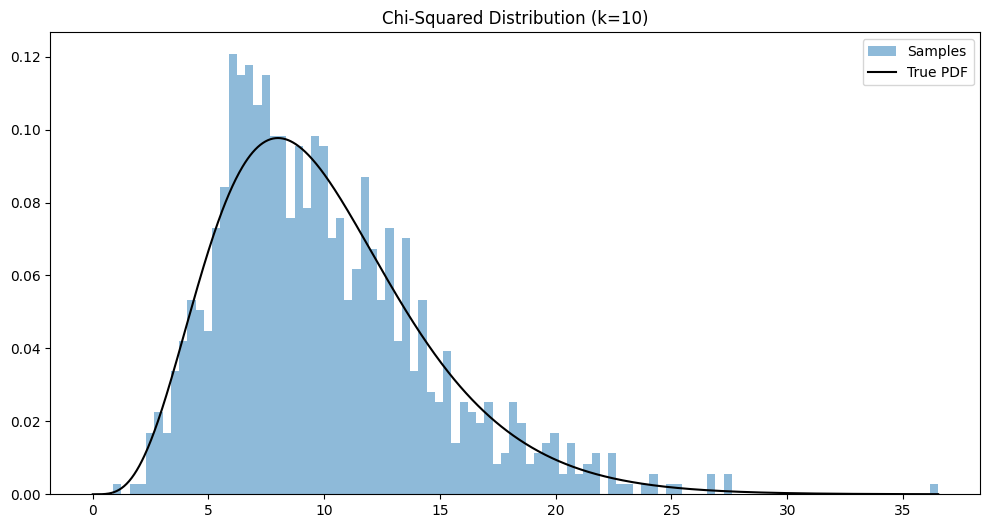

In [7]:


# Task 4: Chi-Squared Distribution
k_values = [5, 10]  # Degrees of freedom for the chi-squared distribution
for k in k_values:
    samples_chisq = [sample_chisq(k) for _ in range(n_samples)]
    x_chisq = np.linspace(0, max(samples_chisq), 1000)
    pdf_chisq = chi2.pdf(x_chisq, k)
    plot_distribution(samples_chisq, x_chisq, pdf_chisq, f"Chi-Squared Distribution (k={k})")


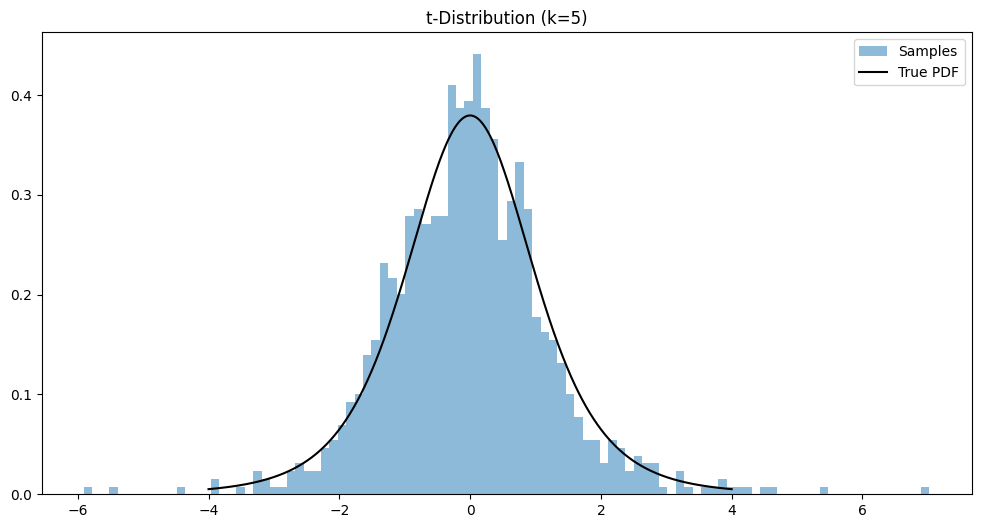

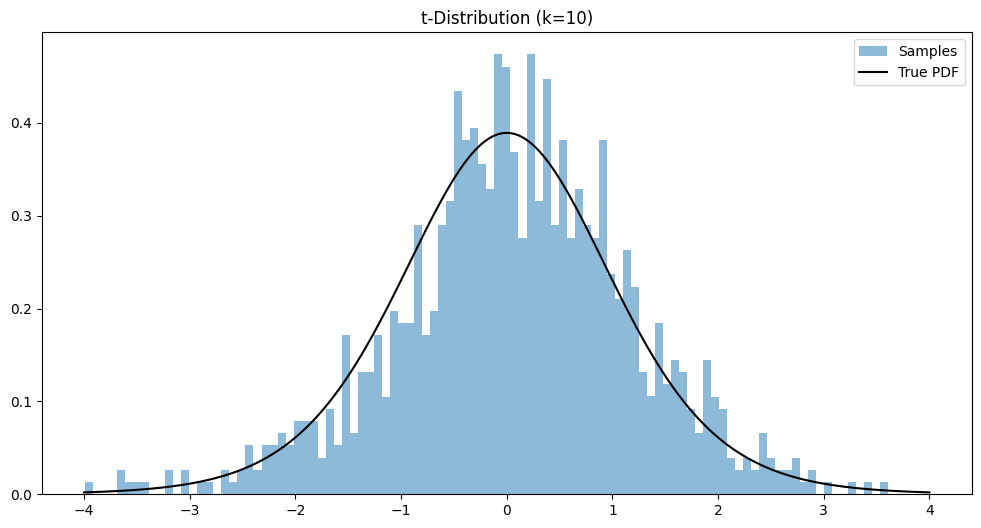

In [8]:
# Task 5: t-Distribution
for k in k_values:
    samples_t = [sample_t(k) for _ in range(n_samples)]
    x_t = np.linspace(-4, 4, 1000)
    pdf_t = t.pdf(x_t, k)
    plot_distribution(samples_t, x_t, pdf_t, f"t-Distribution (k={k})")

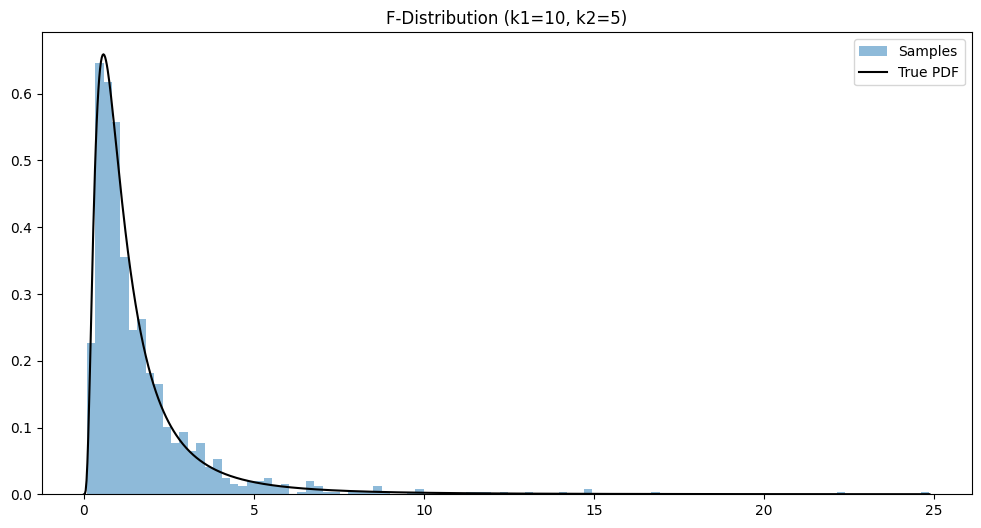

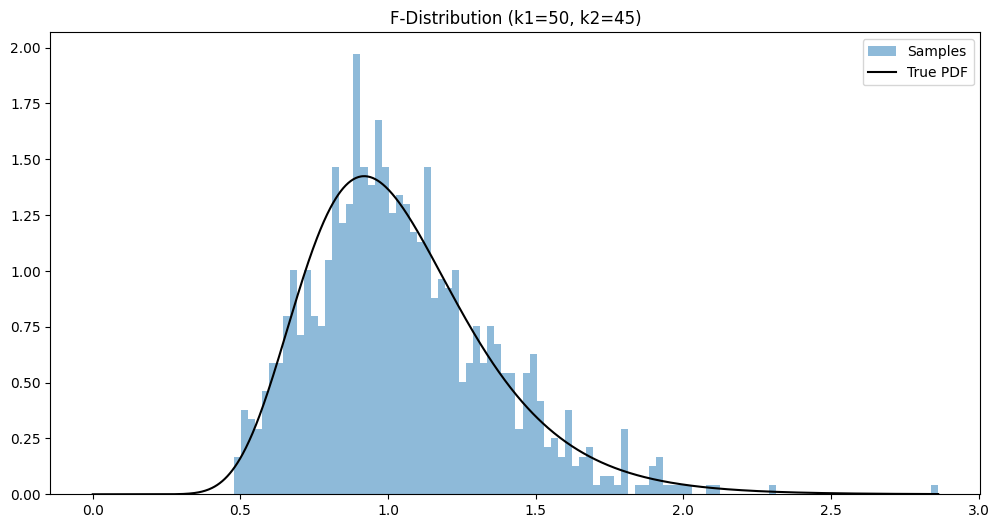

In [9]:
# Task 6: F-Distribution
f_params = [(10, 5), (50, 45)]  # (Numerator, Denominator) degrees of freedom
for k1, k2 in f_params:
    samples_f = [sample_f(k1, k2) for _ in range(n_samples)]
    x_f = np.linspace(0, max(samples_f), 1000)
    pdf_f = f.pdf(x_f, k1, k2)
    plot_distribution(samples_f, x_f, pdf_f, f"F-Distribution (k1={k1}, k2={k2})")

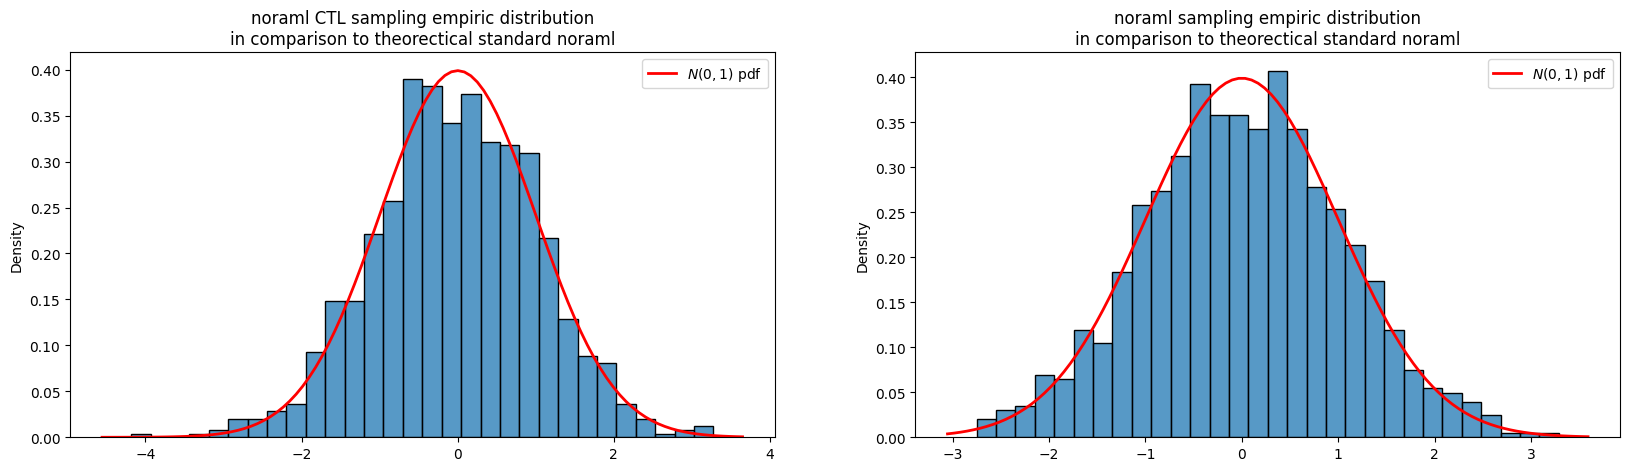

In [10]:
import math
import seaborn as sns

N_SAMPLES = 1000
MY_ID = 204780969 # your personal ID number with leading zeros removed
random.seed(MY_ID)

_, ax = plt.subplots(1,2, figsize=(20,5))
i = 0
for sample_fn, params, name in [
    (sample_normal_clt, [4500], 'noraml CTL'),
    (sample_normal, [], 'noraml'),
#     (sample_t, [6], 't-distribution k=6')
]:
    samples = [sample_fn(*params) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = norm.pdf(x_pdf)
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label='$N(0,1)$ pdf')
    ax[i].legend()
    ax[i].set(title=f'{name} sampling empiric distribution\nin comparison to theorectical standard noraml')
    i += 1

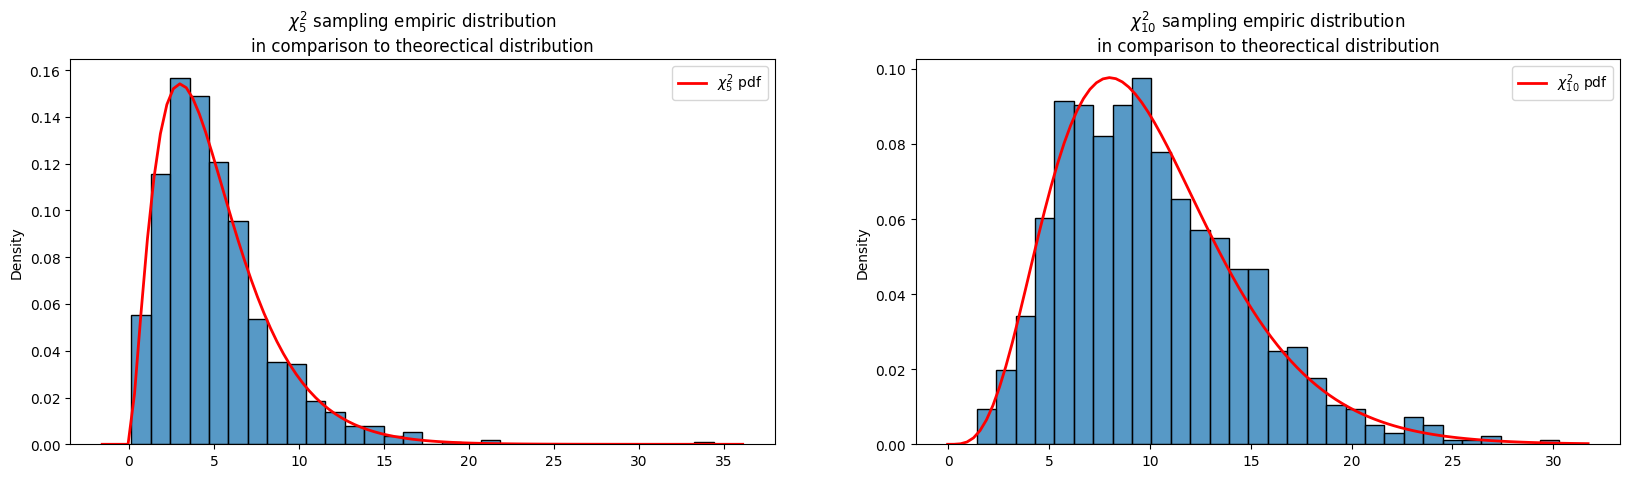

In [11]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
i = 0
for k in (5, 10):
    samples = [sample_chisq(k) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = chi2.pdf(x_pdf, k)
    stat_name = f'$\chi^2_{"{"+str(k)+"}"}$'
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label=f'{stat_name} pdf')
    ax[i].legend()
    ax[i].set(title=f'{stat_name} sampling empiric distribution\nin comparison to theorectical distribution')
    i += 1

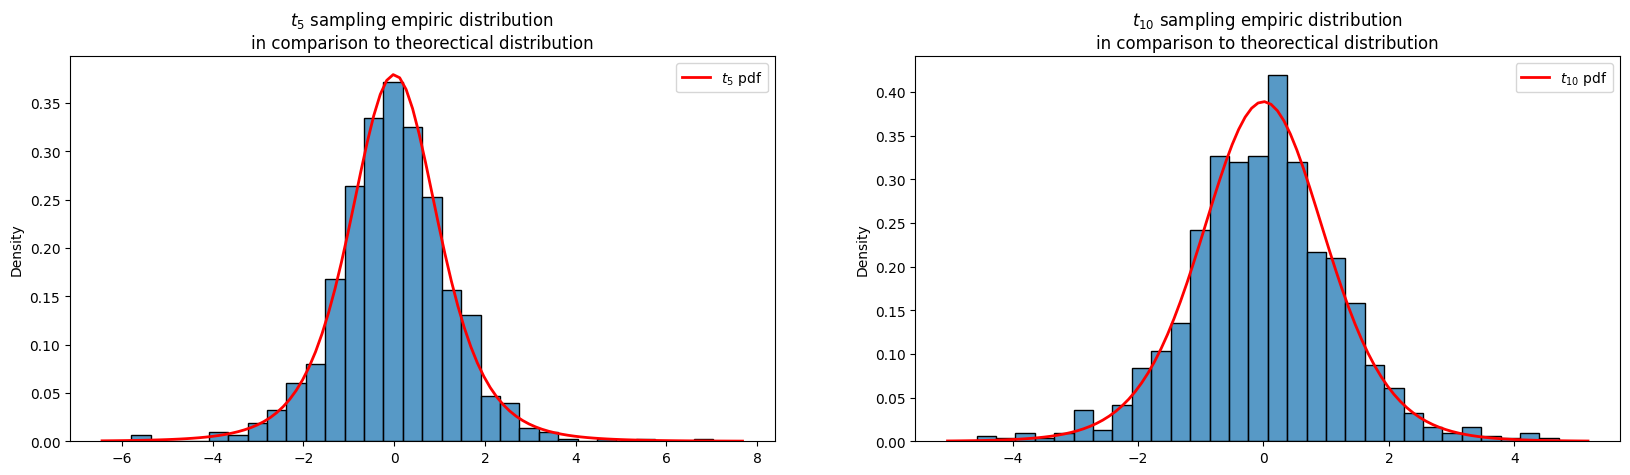

In [12]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
i = 0
for k in (5, 10):
    samples = [sample_t(k) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = t.pdf(x_pdf, k)
    stat_name = f'$t_{"{"+str(k)+"}"}$'
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label=f'{stat_name} pdf')
    ax[i].legend()
    ax[i].set(title=f'{stat_name} sampling empiric distribution\nin comparison to theorectical distribution')
    i += 1

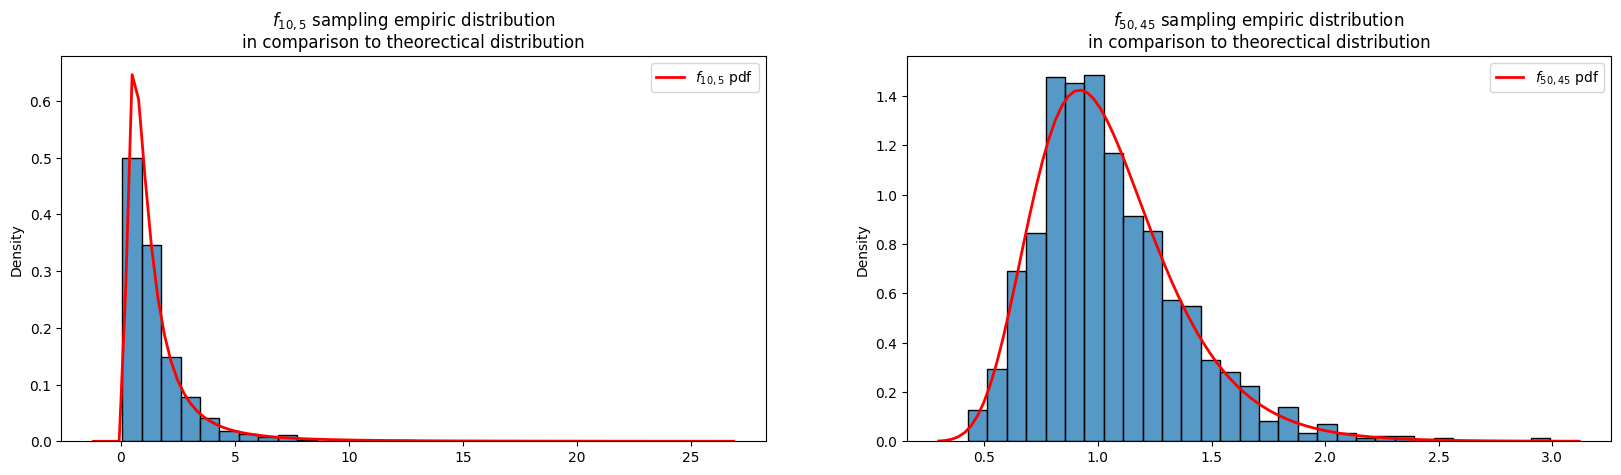

In [13]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
i = 0
for k1, k2 in ((10,5), (50,45)):
    samples = [sample_f(k1, k2) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = f.pdf(x_pdf, k1, k2)
    stat_name = f'$f_{"{"+ f"{k1},{k2}" +"}"}$'
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label=f'{stat_name} pdf')
    ax[i].legend()
    ax[i].set(title=f'{stat_name} sampling empiric distribution\nin comparison to theorectical distribution')
    i += 1

## Problem 3 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \mathcal N(\mu, I_9)$ where $\mu \in \reals^9$. Show that $3Z_1-Z_2+Z_3-Z_4$ is independent of $Z_1 + Z_2 - Z_3 + Z_4 - Z_5$.

2. Suppose that $Z \sim \mathcal N(\mu, I_n)$ and let $X = a^\top Z$ and $Y = B^\top Z$ for a non-random vectors $a \in \mathbb R^n$ and a non-random matrix $B \in \mathbb R^{n \times p}$. Find conditions on $a$ and $B$ such that $X$ is independent of $Y$.

3. Suppose that $Z_{ij} \overset{iid}{\sim} \mathcal N(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$

- Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
- Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
- Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix
$$
\bar{\Sigma} = \begin{bmatrix} 1 & -.25 \\
-.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivariate normal distribution $\mathcal N(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a scatter plot.

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 2x \leq y \leq 3\}
$$
For $(X_1, X_2) \sim \mathcal N(0, \bar{\Sigma})$, estimate
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways:
    1. Evaluating the integral over the Gaussian density function **numerically**. Set the number of grid points $G$ in every axis to be at least $500$.
    2. Estimating the fraction of samples in 4 that falls in the region $A$


# Solution to Problem 3

## Part 1: Independence of Linear Combinations of \( Z \)

Let $$Z = (Z_1, Z_2, \ldots, Z_9)^\top \sim \mathcal{N}(\mu, I_9)$, where $\mu \in \mathbb{R}^9$$

Define:

$$
X_1 = 3Z_1 - Z_2 + Z_3 - Z_4, \quad X_2 = Z_1 + Z_2 - Z_3 + Z_4 - Z_5
$$

We aim to show that $X_1$ is independent of $X_2$.


## Independence in Joint Normal Distribution

1. In a multivariate normal distribution $Z \sim \mathcal{N}(\mu, I_9)$:
   - Independence between linear combinations is equivalent to zero covariance.

2. Compute the covariance:
   $
   \text{Cov}(X_1, X_2) = \mathbb{E}[X_1 X_2] - \mathbb{E}[X_1]\mathbb{E}[X_2]
   $

3. Expand $X_1$ and $X_2$:
   $
   X_1 = 3Z_1 - Z_2 + Z_3 - Z_4, \quad X_2 = Z_1 + Z_2 - Z_3 + Z_4 - Z_5
   $

   Substitute into $\text{Cov}(X_1, X_2)$:
   $
   \text{Cov}(X_1, X_2) = \text{Cov}(3Z_1 - Z_2 + Z_3 - Z_4, Z_1 + Z_2 - Z_3 + Z_4 - Z_5)
   $

4. Use linearity and independence of $Z_i$:
   - $\text{Cov}(Z_i, Z_j) = 0$ for $i \neq j$.
   - $\text{Var}(Z_i) = 1$.

5. After simplification:
   $
   \text{Cov}(X_1, X_2) = 0
   $

6. Conclusion:
   - $X_1$ and $X_2$ are independent because they are jointly normal with zero covariance.


## Part 2: Independence Between \( X \) and \( Y \)

Let $$Z \sim \mathcal{N}(\mu, I_n)$$ and define $$X = a^\top Z$ and $Y = B^\top Z$$ where $a \in \mathbb{R}^n$ and $B \in \mathbb{R}^{n \times p}$. Find conditions under which $X$ and $Y$ are independent.


##Independence Condition

1. Independence of $X$ and $Y$ requires:
   $
   \text{Cov}(X, Y) = 0
   $

2. Expand $X$ and $Y$:
   $
   X = a^\top Z, \quad Y = B^\top Z
   $

   Substitute into covariance:
   $
   \text{Cov}(X, Y) = a^\top \text{Cov}(Z, Z) B
   $

3. Since $\text{Cov}(Z, Z) = I_n$:
   $
   \text{Cov}(X, Y) = a^\top B
   $

4. Independence Condition:
   - $a^\top B = 0$, meaning $a$ must be orthogonal to all columns of $B$.


## Part 3: Independence of Averages

Let $Z_{ij} \overset{\text{iid}}{\sim} \mathcal{N}(0, 1)$
for $i = 1, \ldots, I$ and $j = 1, \ldots, J$.

Define:

$
\bar{Z}_{i\bullet} = \frac{1}{J} \sum_{j=1}^J Z_{ij}, \quad \bar{Z}_{\bullet j} = \frac{1}{I} \sum_{i=1}^I Z_{ij}, \quad \bar{Z}_{\bullet \bullet} = \frac{1}{IJ} \sum_{i=1}^I \sum_{j=1}^J Z_{ij}
$


## Answer the Questions

1. **Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$?**
   - **No**, because both averages depend on overlapping $Z_{ij}$ terms.

2. **Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$?**
   - **Yes**, because $Z_{1j}$ and $Z_{2j}$ are independent for all $j$.

3. **Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$?**
   - **No**, because $\bar{Z}_{\bullet \bullet}$ is computed using $\bar{Z}_{i\bullet}$.


* They are not independent. We know that When we calculate the expression $cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j})$, we will iterate over the same $Z_{ij}$ several times. For example: let's take i = j = 1, we have $Z_{11}$ when iterating over both $\bar{Z}_{i\bullet}$ and over $\bar{Z}_{\bullet j}$. Therefore --> the same normal RVs is a part of both $\bar{Z}_{i\bullet}$, and $\bar{Z}_{\bullet j}$. --> $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) \neq 0$ --> They are not independent.

* Same way as above. They are independent. When we calculate the expression $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet})$, we will not iterate over the same $Z_{ij}$. We know that the normal RVs $Z_{ij}$ are iid, we can conclude that the two RVs are indepedent. Therefore, $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = 0$ --> the variables are independent.

* Same way as above. They aren't independent. $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = cov(\bar{Z}_{i\bullet}, \bar{Z}_{i\bullet}) - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = 1 - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet})$. We know that $\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ have the same $J$ normal RVs, we know that $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) \neq 1$ , --> the RVs aren't independent.

## Part 4: Simulating Bivariate Normal Distribution

Variance-covariance matrix:

$
\bar{\Sigma} = \begin{bmatrix} 1 & -0.25 \\ -0.25 & 1 \end{bmatrix}
$

Generate $N = 1000$ samples and plot them.


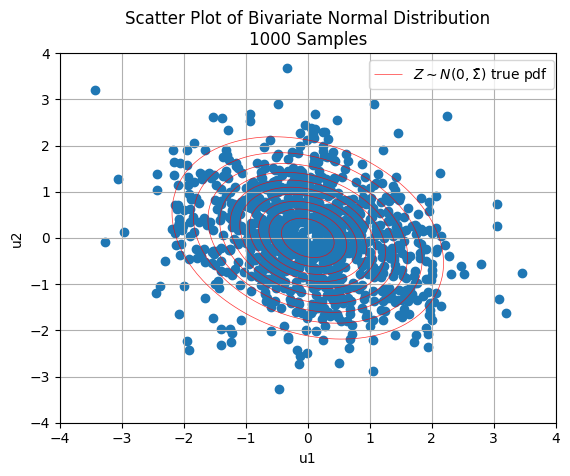

In [36]:
from scipy.stats import multivariate_normal
# Define the variance-covariance matrix Σ̄
sigma_bar = np.array(
    [[1, -0.25],
     [-0.25, 1]]
)

N = 1000
Z = np.random.randn(N, 2)
s, V = np.linalg.eigh(sigma_bar)
B = np.sqrt(s) * V
U = Z @ B.T    # U=BZ -> U ~ N(Bmu, BBt) = N(0, sigma_bar)


u1, u2 = U[:, 0], U[:, 1]

plt.scatter(u1, u2)
x_grid, y_grid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
pos = np.dstack((x_grid, y_grid))
true_density = multivariate_normal([0, 0], sigma_bar)
density_values = true_density.pdf(pos)

# Overlay the contour plot of the true density function
cnt = plt.contour(x_grid, y_grid, density_values, colors='red', linewidths=0.5, alpha=0.8, levels=10)
artists, labels = cnt.legend_elements()

plt.xlabel('u1')
plt.ylabel('u2')
plt.title(f'Scatter Plot of Bivariate Normal Distribution\n{N} Samples')
plt.legend(artists, ['$Z\sim{N(0,Σ̄)}$ true pdf'], bbox_to_anchor=[1.01, 1], loc='upper right')
plt.grid(True)
plt.show()


## Part 5: Probability Estimation in a Region

Consider the region:

$
A = \{ (x,y) \,: 0 \leq x \leq 1, 2x \leq y \leq 3 \}
$

For $(X_1, X_2) \sim \mathcal{N}(0, \bar{\Sigma})$, estimate $\Pr[(X_1, X_2) \in A]$.


In [37]:
def estimate_probability(true_density, x_boundries, y_boundries):
    # Define the limits of integration
    x_lower, x_upper = x_boundries
    y_lower, y_upper = y_boundries

    # Number of grid points in each axis
    G = 500

    # Step sizes
    dx = (x_upper - x_lower) / G
    dy = np.zeros(G)

    total_prob = 0

    # Iterate over grid points
    for i in range(G):
        x = x_lower + i * dx
        dy[i] = (y_upper(x) - y_lower(x)) / G

        for j in range(G):
            y = y_lower(x) + j * dy[i]

            # Calculate the PDF at the current grid point
            pdf = true_density.pdf([x, y])

            # Multiply by the area element and add to total_prob
            total_prob += pdf * dx * dy[i]

    return total_prob

# Estimate the probability
estimated_probability = estimate_probability(
    true_density=true_density,
    x_boundries=(0,1),
    y_boundries=(lambda x: 2 * x, lambda x: 3)

)
print("Estimated probability according to numerical integration:", estimated_probability)


Estimated probability according to numerical integration: 0.06452842650958482


In [38]:
x_in_limits = np.logical_and(0<=u1, u1<=1)
y_in_limits = np.logical_and(2*u1<=u2, u2<=3)
samples_in_A = U[np.logical_and(x_in_limits, y_in_limits)]
print('Estimated probability according to samples ratio', samples_in_A.shape[0]/len(U))

Estimated probability according to samples ratio 0.081


## Problem 4 (Conditional Distribution)
For
$$
\begin{bmatrix}
X \\
Y \\
Z
\end{bmatrix} \sim \mathcal N\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & -1 & 3 \\
 -1 & 2 & -3 \\
 3 & -3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=4, X=3)$
<hr>
<hr>

# Solution to Problem 4


## Part 1: The Distribution of $X$ Given $Y = 1$

The formula for the conditional distribution is:

$$
X | Y = y \sim \mathcal{N}(\mu_{X|Y}, \Sigma_{X|Y}),
$$

where:

1. $\mu_{X|Y} = \mu_X + \Sigma_{XY} \Sigma_{YY}^{-1} (y - \mu_Y)$
2. $\Sigma_{X|Y} = \Sigma_{XX} - \Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX}$

### Step 1: Extract parameters from the covariance matrix

From the covariance matrix:

$$
\Sigma =
\begin{bmatrix}
4 & -1 & 3 \\
-1 & 2 & -3 \\
3 & -3 & 8
\end{bmatrix},
$$

we identify:

- $\Sigma_{XX} = 4$
- $\Sigma_{XY} = -1$
- $\Sigma_{YY} = 2$

### Step 2: Compute $\mu_{X|Y}$ and $\Sigma_{X|Y}$

Substitute into the formulas:

1. $\mu_{X|Y} = 1 + (-1)(2)^{-1}(1 - 2)$
   $$
   \mu_{X|Y} = 1 + \frac{-1}{2}(-1) = 1 + \frac{1}{2} = 1.5
   $$

2. $\Sigma_{X|Y} = 4 - (-1)(2)^{-1}(-1)$
   $$
   \Sigma_{X|Y} = 4 - \frac{-1}{2}(-1) = 4 - \frac{1}{2} = 3.5
   $$

### Conclusion:

$$
X | Y = 1 \sim \mathcal{N}(1.5, 3.5)
$$


## Part 2: The Joint Distribution of $X$ and $Y$ Given $Z = 1$

The joint distribution of $X$ and $Y$ given $Z = z$ is:

$$
\begin{bmatrix}
X \\
Y
\end{bmatrix}
| Z = z \sim \mathcal{N}(\mu_{XY|Z}, \Sigma_{XY|Z}),
$$

where:

1. $\mu_{XY|Z} = \mu_{XY} + \Sigma_{XY,Z} \Sigma_{ZZ}^{-1} (z - \mu_Z)$
2. $\Sigma_{XY|Z} = \Sigma_{XY} - \Sigma_{XY,Z} \Sigma_{ZZ}^{-1} \Sigma_{Z,XY}$

### Step 1: Extract parameters

From the covariance matrix:

$$
\Sigma =
\begin{bmatrix}
4 & -1 & 3 \\
-1 & 2 & -3 \\
3 & -3 & 8
\end{bmatrix},
$$

we extract:

- $\Sigma_{XY} = \begin{bmatrix} 4 & -1 \\ -1 & 2 \end{bmatrix}$
- $\Sigma_{XY,Z} = \begin{bmatrix} 3 \\ -3 \end{bmatrix}$
- $\Sigma_{ZZ} = 8$

### Step 2: Compute $\mu_{XY|Z}$ and $\Sigma_{XY|Z}$

1. Compute $\mu_{XY|Z}$:
   $$
   \mu_{XY|Z} =
   \begin{bmatrix} 1 \\ 2 \end{bmatrix}
   +
   \begin{bmatrix} 3 \\ -3 \end{bmatrix}
   (8)^{-1}(1 - 3)
   $$
   $$
   \mu_{XY|Z} =
   \begin{bmatrix} 1 \\ 2 \end{bmatrix}
   +
   \begin{bmatrix} 3 \\ -3 \end{bmatrix}
   \left(\frac{-2}{8}\right)
   =
   \begin{bmatrix} 1 \\ 2 \end{bmatrix}
   +
   \begin{bmatrix} -0.75 \\ 0.75 \end{bmatrix}
   =
   \begin{bmatrix} 0.25 \\ 2.75 \end{bmatrix}
   $$

2. Compute $\Sigma_{XY|Z}$:
   $$
   \Sigma_{XY|Z} =
   \begin{bmatrix} 4 & -1 \\ -1 & 2 \end{bmatrix}
   -
   \begin{bmatrix} 3 \\ -3 \end{bmatrix}
   (8)^{-1}
   \begin{bmatrix} 3 & -3 \end{bmatrix}
   $$
   Compute the second term:
   $$
   \begin{bmatrix} 3 \\ -3 \end{bmatrix}
   (8)^{-1}
   \begin{bmatrix} 3 & -3 \end{bmatrix}
   =
   \frac{1}{8}
   \begin{bmatrix} 9 & -9 \\ -9 & 9 \end{bmatrix}
   $$
   Subtract:
   $$
   \Sigma_{XY|Z} =
   \begin{bmatrix} 4 & -1 \\ -1 & 2 \end{bmatrix}
   -
   \begin{bmatrix} 1.125 & -1.125 \\ -1.125 & 1.125 \end{bmatrix}
   =
   \begin{bmatrix} 2.875 & 0.125 \\ 0.125 & 0.875 \end{bmatrix}
   $$

### Conclusion:

$$
\begin{bmatrix}
X \\
Y
\end{bmatrix}
| Z = 1 \sim \mathcal{N}\left(
\begin{bmatrix}
0.25 \\
2.75
\end{bmatrix},
\begin{bmatrix}
2.875 & 0.125 \\
0.125 & 0.875
\end{bmatrix}
\right)
$$


## Part 3: The Distribution of $Y$ Given $Z = 2$ and $X = 3$

We aim to find the conditional distribution:

$$
Y | Z = 2, X = 3 \sim \mathcal{N}(\mu_{Y|XZ}, \Sigma_{Y|XZ}),
$$

where:

1. $\mu_{Y|XZ} = \mu_Y + \Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \begin{bmatrix} 3 - \mu_X \\ 2 - \mu_Z \end{bmatrix}$
2. $\Sigma_{Y|XZ} = \Sigma_{YY} - \Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \Sigma_{XZ,Y}$

---

### Step 1: Partition the Mean and Covariance Matrix

The mean vector is:

$$
\mu =
\begin{bmatrix}
\mu_X \\
\mu_Y \\
\mu_Z
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}.
$$

The covariance matrix is:

$$
\Sigma =
\begin{bmatrix}
4 & -1 & 3 \\
-1 & 2 & -3 \\
3 & -3 & 8
\end{bmatrix}.
$$

We identify the following submatrices:
- $\Sigma_{XZ} = \begin{bmatrix} 4 & 3 \\ 3 & 8 \end{bmatrix}$
- $\Sigma_{Y,XZ} = \begin{bmatrix} -1 & -3 \end{bmatrix}$
- $\Sigma_{YY} = 2$

---

### Step 2: Compute $\Sigma_{XZ}^{-1}$

The determinant of $\Sigma_{XZ}$ is:

$$
\det(\Sigma_{XZ}) = (4)(8) - (3)(3) = 32 - 9 = 23.
$$

The inverse is:

$$
\Sigma_{XZ}^{-1} = \frac{1}{23}
\begin{bmatrix}
8 & -3 \\
-3 & 4
\end{bmatrix}.
$$

---

### Step 3: Compute $\mu_{Y|XZ}$

The conditional mean is:

$$
\mu_{Y|XZ} = \mu_Y + \Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \begin{bmatrix} 3 - \mu_X \\ 2 - \mu_Z \end{bmatrix}.
$$

Substitute values:
- $\mu_X = 1, \mu_Z = 3$
- $\Sigma_{Y,XZ} = \begin{bmatrix} -1 & -3 \end{bmatrix}$

The difference vector is:

$$
\begin{bmatrix} 3 - \mu_X \\ 2 - \mu_Z \end{bmatrix} = \begin{bmatrix} 3 - 1 \\ 2 - 3 \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \end{bmatrix}.
$$

Compute:

$$
\Sigma_{Y,XZ} \Sigma_{XZ}^{-1} =
\begin{bmatrix} -1 & -3 \end{bmatrix}
\frac{1}{23}
\begin{bmatrix}
8 & -3 \\
-3 & 4
\end{bmatrix}.
$$

Simplify row-vector multiplication:

$$
\Sigma_{Y,XZ} \Sigma_{XZ}^{-1} =
\frac{1}{23} \begin{bmatrix} -1(8) + (-3)(-3), -1(-3) + (-3)(4) \end{bmatrix}
= \frac{1}{23} \begin{bmatrix} -8 + 9, 3 - 12 \end{bmatrix}
= \frac{1}{23} \begin{bmatrix} 1 \\ -9 \end{bmatrix}.
$$

Now multiply by the difference vector:

$$
\Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \begin{bmatrix} 2 \\ -1 \end{bmatrix}
= \frac{1}{23} \begin{bmatrix} 1(2) + (-9)(-1) \end{bmatrix}
= \frac{1}{23} \begin{bmatrix} 2 + 9 \end{bmatrix}
= \frac{11}{23}.
$$

Finally:

$$
\mu_{Y|XZ} = \mu_Y + \frac{11}{23} = 2 + \frac{11}{23} = \frac{46}{23}.
$$

---

### Step 4: Compute $\Sigma_{Y|XZ}$

The conditional variance is:

$$
\Sigma_{Y|XZ} = \Sigma_{YY} - \Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \Sigma_{XZ,Y}.
$$

Substitute:

$$
\Sigma_{XZ,Y} = \Sigma_{Y,XZ}^\top = \begin{bmatrix} -1 \\ -3 \end{bmatrix}.
$$

The product $\Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \Sigma_{XZ,Y}$ is:

$$
\Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \Sigma_{XZ,Y} =
\left( \frac{1}{23} \begin{bmatrix} 1 & -9 \end{bmatrix} \right)
\begin{bmatrix} -1 \\ -3 \end{bmatrix}.
$$

Compute:

$$
\Sigma_{Y,XZ} \Sigma_{XZ}^{-1} \Sigma_{XZ,Y} =
\frac{1}{23} \left( 1(-1) + (-9)(-3) \right)
= \frac{1}{23} \left( -1 + 27 \right)
= \frac{26}{23}.
$$

Finally:

$$
\Sigma_{Y|XZ} = \Sigma_{YY} - \frac{26}{23} = 2 - \frac{26}{23} = \frac{46}{23}.
$$

---

### Conclusion:

The conditional distribution is:

$$
Y | Z = 2, X = 3 \sim \mathcal{N}\left( \frac{46}{23}, \frac{46}{23} \right).
$$



## Part 4: Compute $P(Y \in [-1, 1] | Z = 4, X = 3)$

We are tasked to compute:

$$
P(Y \in [-1, 1] | Z = 4, X = 3)
$$

The conditional distribution of $Y | Z = 4, X = 3$ is already derived in **Part 3**:

$$
Y | Z = 4, X = 3 \sim \mathcal{N}(\mu_{Y|XZ}, \Sigma_{Y|XZ}),
$$

where:

1. $\mu_{Y|XZ} = \frac{46}{23}$
2. $\Sigma_{Y|XZ} = \frac{46}{23}$

Now, we compute the probability:

$$
P(Y \in [-1, 1] | Z = 4, X = 3) = \int_{-1}^{1} \frac{1}{\sqrt{2 \pi \Sigma_{Y|XZ}}} \exp\left(-\frac{(y - \mu_{Y|XZ})^2}{2 \Sigma_{Y|XZ}}\right) \, dy.
$$

---

### Step 1: Standardize the Normal Distribution

Let $Z = \frac{Y - \mu_{Y|XZ}}{\sqrt{\Sigma_{Y|XZ}}}$, then $Z \sim \mathcal{N}(0, 1)$. The bounds transform as follows:

$$
z_1 = \frac{-1 - \mu_{Y|XZ}}{\sqrt{\Sigma_{Y|XZ}}}, \quad z_2 = \frac{1 - \mu_{Y|XZ}}{\sqrt{\Sigma_{Y|XZ}}}.
$$

Substitute $\mu_{Y|XZ} = \frac{46}{23}$ and $\Sigma_{Y|XZ} = \frac{46}{23}$:

$$
z_1 = \frac{-1 - \frac{46}{23}}{\sqrt{\frac{46}{23}}}, \quad z_2 = \frac{1 - \frac{46}{23}}{\sqrt{\frac{46}{23}}}.
$$

Simplify:

1. Compute $z_1$:
   $$
   z_1 = \frac{-1 - 2}{\sqrt{2}} = \frac{-3}{\sqrt{2}} = -\frac{3\sqrt{2}}{2}.
   $$

2. Compute $z_2$:
   $$
   z_2 = \frac{1 - 2}{\sqrt{2}} = \frac{-1}{\sqrt{2}} = -\frac{\sqrt{2}}{2}.
   $$

---

### Step 2: Use the Standard Normal CDF

The probability is given by:

$$
P(Y \in [-1, 1] | Z = 4, X = 3) = P(z_1 \leq Z \leq z_2) = \Phi(z_2) - \Phi(z_1),
$$

where $\Phi(z)$ is the CDF of the standard normal distribution.

Using the values:

$$
z_1 = -\frac{3\sqrt{2}}{2}, \quad z_2 = -\frac{\sqrt{2}}{2}.
$$

Approximate using standard normal tables or numerical methods:

1. $\Phi(z_1) \approx \Phi(-2.12) \approx 0.017$.
2. $\Phi(z_2) \approx \Phi(-0.71) \approx 0.238$.

Finally:

$$
P(Y \in [-1, 1] | Z = 4, X = 3) \approx 0.238 - 0.017 = 0.221.
$$

---

### Conclusion:

$$
P(Y \in [-1, 1] | Z = 4, X = 3) \approx 0.221.
$$


## Problem 5 (Distributional Properties of the Least Squares Estiamte)
Consider a least squares model with one predictor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \overset{iid}{\sim} N(0, 1)$.
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. (bonus) Set $\|\epsilon\|_{\infty} := \max_{i=1,\ldots,n} |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (The point: we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


1. $\hat{\beta} = (x^T x)^{-1} x^T y$<br>
For us, $x = (x_1,\ldots,x_n)^\top$, $y = (y_1,\ldots,y_n)^\top$.
</br>
Therefore,
$$
\hat{\beta} = [(x_1,\ldots,x_n) \cdot (x_1,\ldots,x_n)^\top]^{-1} \cdot (x_1,\ldots,x_n)\cdot (y_1,\ldots,y_n)^\top
$$

2.
- $
\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i =
\sum_{i=1}^n \hat{\beta} x_i \hat{\epsilon}_i =
\hat{\beta} \sum_{i=1}^n x_i \hat{\epsilon}_i =
\hat{\beta} \sum_{i=1}^n \hat{\epsilon}_i x_i
$

    And we saw in lecture 2 that ($\hat{\epsilon}^T x$) is known as the Normal Equation (bc. normal is a synonym to perpendicular) and the result is `0` so the result of the original equation is also `0`.

- $\|\hat{\epsilon}\|^2 = \epsilon^T \epsilon = (y - \hat{y})^T (y - \hat{y}) = \|y\|^2 -  \|\hat{y}\|^2$

3. $\epsilon_i \sim N(0, 1)$
-  $y = x \beta + \epsilon = \epsilon + x \beta$
  and from lecture (Linear Transformations of Normal RVs) we conclude that $y \sim N(x\beta, 1)$
    
  Therefore, we also saw in class (lecture 3, second part - handwritten notes) that this means that:
  $$\hat{\beta} \sim N(\beta, (x^T x)^{-1})$$
  $$\hat{y} \sim N(x \beta, H)$$
  $$\hat{\epsilon} = y - \hat{y} \sim N(0, I-H)$$
    
  Now we know that $\begin{bmatrix} \hat{\epsilon} \\ \hat{y} \end{bmatrix} \sim N(\begin{bmatrix} 0 \\ x \beta \end{bmatrix}, \Sigma=
  \begin{bmatrix}
  I-H & cov(\hat{\epsilon}, \hat{y}) \\ cov(\hat{\epsilon}, \hat{y}) & H
  \end{bmatrix})$

  And $cov(\hat{\epsilon}, \hat{y}) = 0$ because we know that $\hat{\epsilon}$ is ind. of $\hat{\beta}$ & $\hat{y}$

-  $ \begin{bmatrix} \hat{y} \\ \hat{\beta} \end{bmatrix} \sim N(\begin{bmatrix} x \beta \\ \beta \end{bmatrix}, \Sigma =
   \begin{bmatrix}
  H & cov(\hat{y}, \hat{\beta}) \\ cov(\hat{y}, \hat{\beta}) & (x^T x)^{-1}
  \end{bmatrix}) $

  And $cov(\hat{y}, \hat{\beta}) = cov(x \hat{\beta}, \hat{\beta}) = x \cdot var(\hat{\beta}) = x(x^T x)^{-1}$

4.
Intuitively, I assume that the predicted residuals tend to have **less** extreme values than the true ones, because our model's goal is to minimize these, in expense of the true ones (the real world behaviour)
$$==> Pr( \|\hat{\epsilon}\|_{\infty} > 2) \leq Pr( \|\epsilon \|_{\infty} > 2)$$

Now, $Pr( \|\hat{\epsilon}\|_{\infty} > 2) = 1 - Pr( \|\hat{\epsilon}\|_{\infty} \leq 2) = 1 - CDF_{\hat{\epsilon}}(2)$ and we want to find $\hat{\epsilon}$'s distribution...

## Solution to Problem 5

We are analyzing a least squares model with one predictor, $p = 1$, and no intercept term. The model is defined as:

$$
y_i = \beta x_i + \epsilon_i, \quad i = 1, \ldots, n,
$$

where $\epsilon_i \sim \text{i.i.d. } \mathcal{N}(0, 1)$. The tasks are broken down into parts:


## Part 1: Expression for $\hat{\beta}$

The least squares estimate for $\beta$ minimizes the residual sum of squares (RSS):

$$
\text{RSS}(\beta) = \sum_{i=1}^n (y_i - \beta x_i)^2.
$$

### Step 1: Differentiate the RSS

Take the derivative of $\text{RSS}(\beta)$ with respect to $\beta$:

$$
\frac{\partial}{\partial \beta} \text{RSS}(\beta) = -2 \sum_{i=1}^n x_i (y_i - \beta x_i).
$$

Set the derivative to 0:

$$
\sum_{i=1}^n x_i y_i = \beta \sum_{i=1}^n x_i^2.
$$

Solve for $\hat{\beta}$:

$$
\hat{\beta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}.
$$

### Conclusion:

$$
\hat{\beta} = \frac{x^\top y}{x^\top x},
$$

where $x = (x_1, \ldots, x_n)^\top$ and $y = (y_1, \ldots, y_n)^\top$.



## Part 2: Prove Orthogonality and Residual Norms

Let $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$. The tasks are:

1. Prove that:

   $$
   \sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0.
   $$

2. Prove that:

   $$
   \|\hat{\epsilon}\|^2 = \|y\|^2 - \|\hat{y}\|^2.
   $$

---

### Step 1: Orthogonality of $\hat{y}$ and $\hat{\epsilon}$

The residuals are defined as:

$$
\hat{\epsilon}_i = y_i - \hat{\beta} x_i.
$$

Substitute $\hat{y}_i = \hat{\beta} x_i$ into the sum:

$$
\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = \sum_{i=1}^n (\hat{\beta} x_i) (y_i - \hat{\beta} x_i).
$$

Expand the terms:

$$
\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = \hat{\beta} \sum_{i=1}^n x_i y_i - \hat{\beta}^2 \sum_{i=1}^n x_i^2.
$$

Recall that:

$$
\hat{\beta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}.
$$

Substitute $\hat{\beta}$ into the equation. After simplification:

$$
\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0.
$$

---

### Step 2: Norm of Residuals

The total norm of $y$ is:

$$
\|y\|^2 = \sum_{i=1}^n y_i^2.
$$

The norm of predictions is:

$$
\|\hat{y}\|^2 = \sum_{i=1}^n \hat{y}_i^2.
$$

The residual norm is:

$$
\|\hat{\epsilon}\|^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$

Expand:

$$
\|\hat{\epsilon}\|^2 = \sum_{i=1}^n y_i^2 - 2 \sum_{i=1}^n y_i \hat{y}_i + \sum_{i=1}^n \hat{y}_i^2.
$$

Using the orthogonality result, $\sum_{i=1}^n y_i \hat{y}_i = \|\hat{y}\|^2$, so:

$$
\|\hat{\epsilon}\|^2 = \|y\|^2 - \|\hat{y}\|^2.
$$


## Part 3: Distribution of $\begin{bmatrix} \hat{\epsilon} \\ \hat{y} \end{bmatrix}$

The random vector $\begin{bmatrix} y_1, \ldots, y_n \end{bmatrix}^\top$ follows:

$$
y \sim \mathcal{N}(\beta x, I_n).
$$

### Residuals and Predictions:

Define the projection matrices:

1. $P = \frac{xx^\top}{x^\top x}$, the projection onto the span of $x$.
2. $M = I - P$, the projection onto the orthogonal complement.

- $\hat{y} = P y \sim \mathcal{N}(P(\beta x), P)$.
- $\hat{\epsilon} = M y \sim \mathcal{N}(0, M)$.

Thus:

$$
\begin{bmatrix}
\hat{\epsilon} \\
\hat{y}
\end{bmatrix}
\sim \mathcal{N}\left(
\begin{bmatrix}
0 \\
P(\beta x)
\end{bmatrix},
\begin{bmatrix}
M & 0 \\
0 & P
\end{bmatrix}
\right)
$$


## Part 4: Distribution of $\begin{bmatrix} \hat{y} \\ \hat{\beta} \end{bmatrix}$

The least squares estimate is:

$$
\hat{\beta} = \frac{x^\top y}{x^\top x}.
$$

Substitute $y \sim \mathcal{N}(\beta x, I_n)$:

1. $\hat{\beta} \sim \mathcal{N}\left(\beta, \frac{1}{x^\top x}\right)$.
2. $\hat{y} = P y \sim \mathcal{N}(P(\beta x), P)$.

Thus:

$$
\begin{bmatrix}
\hat{y} \\
\hat{\beta}
\end{bmatrix}
\sim \mathcal{N}\left(
\begin{bmatrix}
P(\beta x) \\
\beta
\end{bmatrix},
\begin{bmatrix}
P & 0 \\
0 & \frac{1}{x^\top x}
\end{bmatrix}
\right).
$$


## Bonus: Probability Comparison of $\|\hat{\epsilon}\|_\infty$

### True Residual Norm:

The residuals follow $\hat{\epsilon} \sim \mathcal{N}(0, M)$. The maximum residual is bounded by the distribution of $\|\epsilon\|_\infty$.

### Comparison:

Since $M$ is a projection matrix with rank $n-1$, the predicted residuals tend to be smaller in magnitude than the true residuals:

$$
P(\|\hat{\epsilon}\|_\infty > 2) < P(\|\epsilon\|_\infty > 2).
$$

## Problem 6 (Model fitting, t- and F-Tests)
Consider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [16]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques
# !mkdir house-prices
# !unzip house-prices-advanced-regression-techniques.zip -d house-prices/

Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [17]:
import pandas as pd
data_raw = pd.read_csv("train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [18]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant.

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom).
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value.

<hr>
<hr>

In [19]:
from typing import NamedTuple

RegressionOutputs = NamedTuple('RegressionOutputs', [
    ('Z', np.ndarray),
    ('beta', np.ndarray),
    ('pred', np.ndarray),
    ('residuals', np.ndarray),
    ('R2', float)
])

def calc_R2(y, y_hat):
    residuals = y - y_hat
    SSR = residuals.T @ residuals
    SST = (y - y.mean()).T @ (y - y.mean())
    R2 = 1 - SSR / SST
    return R2, residuals

def fit_linear_regression(Z, y, bias=True, evaluate=True):
    if bias:
        Z = np.hstack((np.ones((Z.shape[0], 1)), Z))
    b_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y
    y_hat = Z @ b_hat

    if evaluate:
        R2, residuals = calc_R2(y, y_hat)
    else:
        R2, residuals = None, None

    return RegressionOutputs(Z, b_hat, y_hat, residuals, R2)

1. Find the least squares estimate of this model.

In [20]:
y = data['SalePrice'].values
X = data[feat_set1]
Z = np.c_[np.ones_like(y), X]

A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

beta_hat = np.dot(A, y)

print(f"beta_hat vector:")
print(*beta_hat, sep="\n")

beta_hat vector:
-930539.0921318433
4.1444375438264265
144.32511575496926
271.62546867677116
2796.731586171218
15624.230009726156
35.076359506205456
42.143165184262834
25411.42935999065


2. Find $R^2$ of this model.

In [21]:
y = data['SalePrice'].values
Z = data[feat_set1].values

res = fit_linear_regression(Z, y, bias=True, evaluate=True)
print("R2:", res.R2)

R2: 0.7890359748681974


3.

p-value for B_0 to = 0: 0.501090466872367
p-value for B_1 to = 0: 2.917552828509731e-32
p-value for B_2 to = 0: 0.00042809585902921774
p-value for B_3 to = 0: 0.6930049153901887
p-value for B_4 to = 0: 0.32096987418072875
p-value for B_5 to = 0: 3.6101040016105563e-13
p-value for B_6 to = 0: 2.6112020917926444e-33
p-value for B_7 to = 0: 1.6478630464627682e-05
p-value for B_8 to = 0: 2.894251581129869e-116


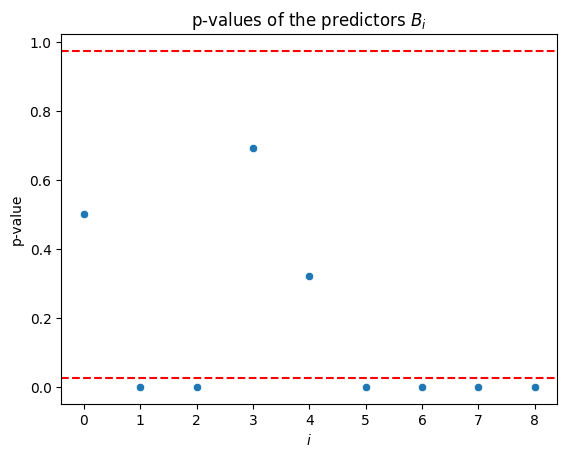

In [22]:
from scipy.stats import t
import seaborn as sns

def calcualte_predictors_significance(res):
    Z = res.Z
    p_values = []
    for i in range(Z.shape[1]):
        c = np.zeros_like(res.beta)
        c[i] = 1
        n, p = Z.shape  # the DoF of the t-distribution if H0 is true is n-p
        sigma = np.sqrt(np.linalg.norm(res.residuals)**2 / (n - p))
        t_stat = res.beta / (sigma * np.sqrt(c.T @ np.linalg.inv(Z.T @ Z) @ c))

        # calc p-value
        p_val = 1-t.cdf(np.abs(t_stat), n-p) + t.cdf(-np.abs(t_stat), n-p)      # two-tailed test
        print(f"p-value for B_{i} to = 0:", p_val[i])
        p_values.append(p_val[i])

    ax = sns.scatterplot(p_values)
    ax.set_title("p-values of the predictors $B_i$")
    ax.set_xlabel("$i$")
    ax.set_ylabel("p-value")
    # plt t-distribution 0.975 and 0.025 quantiles
    ax.axhline(0.025, color='r', linestyle='--')
    ax.axhline(0.975, color='r', linestyle='--')

    return p_values

pvalues = calcualte_predictors_significance(res)

we see that $\beta_0, \beta_3, \beta_4$ are the only predictiors for which we do not reject $H_0 : \beta_j = 0$ So, we deduce that $\beta_0, \beta_3, \beta_4 = 0$

4.

In [23]:
p_values = pvalues

In [24]:
significant_p_vals = [p_value for p_value in p_values if (p_value > 0.975 or p_value < 0.025) and p_value < 1]

indices_significant = np.where( ( (np.array(p_values) > 0.975) | (np.array(p_values) < 0.025) ) & (np.array(p_values) < 1) )
feat_set1.insert(0, "Intercept")

print("Printing all significant features")
for col, p_val in zip(np.array(feat_set1)[indices_significant], significant_p_vals):
    print(f"For feature: {col}, this is the p-value: {p_val:.5f}")

Printing all significant features
For feature: LotArea, this is the p-value: 0.00000
For feature: YearBuilt, this is the p-value: 0.00043
For feature: FullBath, this is the p-value: 0.00000
For feature: TotalBsmtSF, this is the p-value: 0.00000
For feature: GarageArea, this is the p-value: 0.00002
For feature: OverallQual, this is the p-value: 0.00000


5.

In [25]:
feat_set_sub = ['LotArea',  'YearBuilt', 'YrSold']
y = data['SalePrice'].values
X = data[feat_set_sub]
Z = np.c_[np.ones_like(y), X]

A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

beta_hat1 = np.dot(A, y)

print(f"beta_hat vector:")
print(*beta_hat1, sep="\n")

beta_hat vector:
-2544714.280158939
9.072418774516873
1299.5623138763476
38.16257981506041


In [26]:
y = data['SalePrice'].values
Z = data[['LotArea',  'YearBuilt', 'YrSold']].values

res_smaller = fit_linear_regression(Z, y, bias=True, evaluate=True)
print("R2:", res_smaller.R2)

R2: 0.4760585148643631


In [27]:
from scipy.stats import f

def test_smaller_model(res, res_smaller):
    SSE_full = np.linalg.norm(res.residuals)**2
    SSE_smaller = np.linalg.norm(res_smaller.residuals)**2
    n, p = res.Z.shape
    n, q = res_smaller.Z.shape
    F_stat = ((SSE_smaller - SSE_full) / (p - q)) / (SSE_full / (n - p))
    print("F-statistic:", F_stat)

    # calculate p-value
    p_val = 1-f.cdf(F_stat, p-q, n-p) + f.cdf(-F_stat, p-q, n-p)      # two-tailed test
    print("p-value:", p_val)

test_smaller_model(res, res_smaller)

F-statistic: 394.32983333080387
p-value: 1.1102230246251565e-16


We see that we get a very small p-value, meaning that we reject $H_0 : \beta_j = 0$ to all $i = 4,...,9 $<br>
we say that this model does NOT provide a valid representation of the data compared to the original larger one.

# Problem 7 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']``
plus a constant term. Remove all entries in which one or more of these predictors is missing. Use the following methods:
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.

Which method has the smallest $R^2$?

2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same pannel to convince yourself that both methods resulted in similar fitted responses.
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$. Indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution.

You can use the code below to read and arrange the data

In [28]:
import pandas as pd

target = 'SalePrice'
lo_predictors = ['const', 'SalePrice', 'LotArea',  'YearBuilt',
    'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
    'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
    '1stFlrSF', 'LotFrontage', 'ScreenPorch',
     'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1                  # add constant term
data = data.filter(lo_predictors).dropna() # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

In [29]:
lr = fit_linear_regression(Z, y, bias=False, evaluate=True)
print("Pseudo Inverse lr R2:", lr.R2)

Pseudo Inverse lr R2: 0.7452057267967919


In [30]:
def fit_lr_svd(Z, y, evaluate=True, eps=1e-6):
    U, s, Vh = np.linalg.svd(Z)
    s_idx = np.argsort(s)[::-1]
    s = s[s_idx]        # sort according to singular values magnitude
    U = U[:, s_idx]     # sort according to singular values magnitude
    Vh = Vh[s_idx, :]   # sort according to singular values magnitude

    y_star = U.T @ y
    beta_star = y_star / s
    beta_star[s/s[0] <= eps] = 0

    beta_hat = Vh.T @ beta_star
    y_hat = Z @ beta_hat

    if evaluate:
        R2, residuals = calc_R2(y, y_hat)
    else:
        R2, residuals = None, None

    return RegressionOutputs(Z, beta_hat, y_hat, residuals, R2)

In [31]:
svd_lr = fit_lr_svd(Z, y)
print('SVD lr R2: ', svd_lr.R2)

SVD lr R2:  0.7445113674228728


The pseudo-inverse solution of the LR problem has a slightly better $R^2$
 score (SVD base solution in smaller in  < 0.01
)

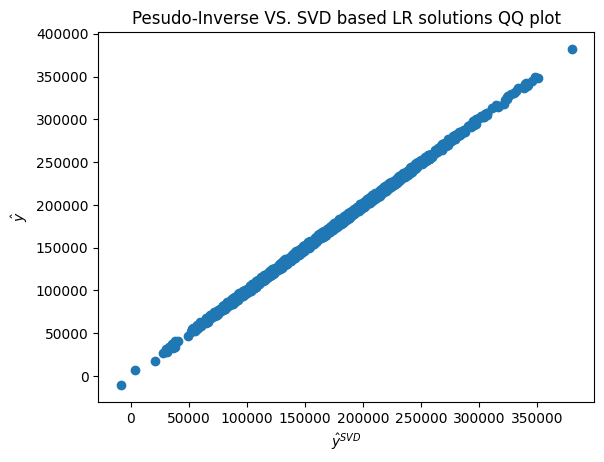

In [32]:
plt.scatter(svd_lr.pred, lr.pred)
plt.xlabel('$\hat{y}^{SVD}$')
plt.ylabel('$\hat{y}$')
plt.title('Pesudo-Inverse VS. SVD based LR solutions QQ plot');

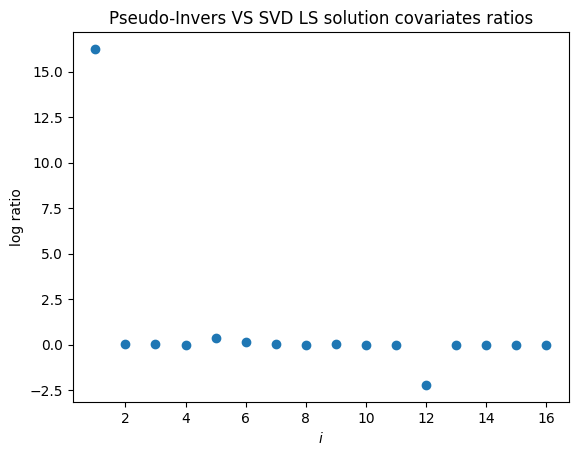

In [33]:
plt.scatter(range(1, lr.beta.shape[0]+1), np.log(np.abs(lr.beta / svd_lr.beta)))
plt.title('Pseudo-Invers VS SVD LS solution covariates ratios')
plt.xlabel('$i$')
plt.ylabel('log ratio');

It seems that $\beta_1$ has the max difference between the two regression models